# Primera red Neuronal

In [26]:
import tensorflow as tf
import numpy as np

In [27]:
celcius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

In [30]:
#Keras nos permite usar tensorflow de manera simple
# Capas densas: hacen la conexion con el resto de capas hidden
# units = output unidades o neuronas
# input_shape: indicamos que tenemos una neurona también
capa =  tf.keras.layers.Dense(units=1, input_shape=[1])
#Necesitamos dar un modelo para entrenarlo
modelo = tf.keras.Sequential([capa])

In [32]:
# Como procesa
# optmizador: Adam le permite ajustar los pesos de manera eficiente
# loss = perdida, una pequeña cantidad de errores grandes es mejor que una gran cantidad de errores pequeños
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

### Entrenar modelo

In [42]:
print('Comenzando entrenamiento...')
#epoch= tantas vueltas que va entrenar el modelo
#verbose = mostrar los prints de entrenamiento
historial = modelo.fit(celcius, fahrenheit, epochs=1500, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


### Resultado perdida
Con esto comprobamos que tan mal estan los resultados con cada vuelta que dió

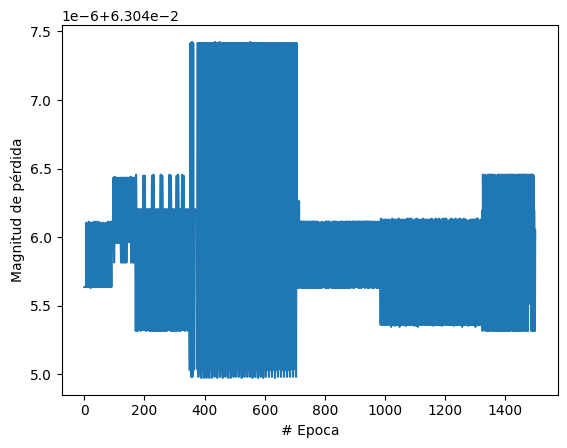

In [43]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

### Predicción

In [44]:
resultado = modelo.predict([100.0])
print(f"El resultado es: {resultado} fahrenheit")

1/1 [==============================] - 0s 145ms/step
El resultado es: [[211.74742]] fahrenheit


### Variables internas del modelo

In [47]:
# El peso es de 1.79
# El sesgo a 31.89
print(capa.get_weights())

[array([[1.7979491]], dtype=float32), array([31.952517], dtype=float32)]


Esto significa que: **100 * 1.79 = 179.8+31.9 = 211.74**

<hr>

## ¿Qué pasaría añadiendo más capas?

In [49]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

In [50]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [51]:
print('Comenzando entrenamiento...')
historial = modelo.fit(celcius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


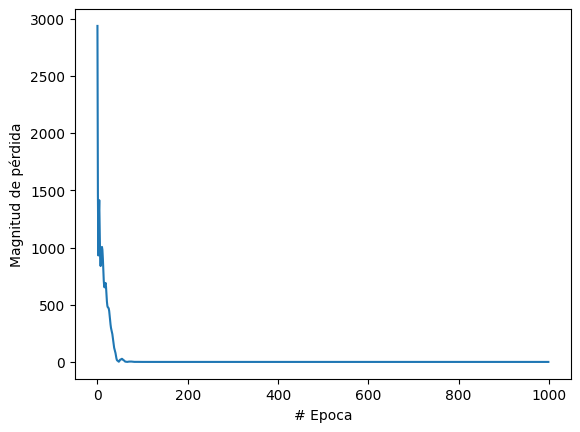

In [52]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

**Como observamos en la mayoría de los casos una red mas compleja nos da mejores resultados**

In [54]:
resultado = modelo.predict([100.0])
print(f"El resultado es: {resultado} fahrenheit")

1/1 [==============================] - 0s 112ms/step
El resultado es: [[211.74745]] fahrenheit


In [55]:
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

[array([[ 0.8597093 , -0.05517541,  0.02838393]], dtype=float32), array([4.450533 , 4.3670483, 2.9400287], dtype=float32)]
[array([[ 0.81428444,  1.1087976 , -0.6684176 ],
       [ 0.12486424,  0.88056195, -0.5174166 ],
       [ 0.8297338 ,  0.5237129 ,  0.4327048 ]], dtype=float32), array([ 4.552215 ,  4.4967847, -3.427885 ], dtype=float32)]
[array([[ 0.64629114],
       [ 0.9959675 ],
       [-0.7847876 ]], dtype=float32), array([4.182671], dtype=float32)]
